### Batch Runner of ModularCirc

This file samples the input parameters of the Korakianitis model then batch solves this using ModularCirc. The raw output, pressure traces, cardiac output are all saved. Additionally a PCA is run on the pressure traces and are also saved.

In [1]:
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
from ModularCirc import BatchRunner

In [3]:
br = BatchRunner('Sobol', 0) 
#'LHS' : LatinHypercube,
#'Sobol' : Sobol,
#'Halton': Halton,

In [4]:
path = os.getcwd()
path

'/Users/pmzff/Documents/GitHub/ModularCirc/Emulation'

In [5]:
# Parameters_01 = Korakianitis Model
br.setup_sampler('parameters_pulmonary_sensitive.json')

In [6]:
# Set number of samples 
n_sample = 5000
br.sample(n_sample)

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [7]:
br.samples

pat.r     pat.c  rv.E_pas  rv.E_act  rv.k_pas  ra.E_pas  ra.E_act  \
0     0.418681  5.439191  0.578021  1.623082  0.012798  0.530351  0.230634   
1     0.245378  2.009408  0.748398  3.143902  0.020537  0.466798  0.347268   
2     0.175394  4.310609  0.447199  1.027756  0.027854  0.287654  0.137255   
3     0.314588  3.018325  0.952510  2.211753  0.015134  0.726176  0.253165   
4     0.375355  4.150716  0.802146  2.517839  0.018272  0.610910  0.174653   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.310197  3.142204  0.575735  2.017942  0.012167  0.340856  0.181059   
4996  0.375522  4.027823  0.341460  2.700309  0.014032  0.448250  0.258309   
4997  0.199836  3.420209  0.846257  0.629219  0.021771  0.509849  0.132031   
4998  0.309334  4.799229  0.639761  2.823779  0.029122  0.736921  0.351706   
4999  0.441302  2.529113  0.809665  1.853185  0.016403  0.300352  0.226153   

      ra.k_pas         T  sas.r  ...  rv.v_ref  rv.v  ra.v_ref  ra.tpwb  ra.v  \
0     0.017784  0.504594  0.003  ...        40    20        20        0    20   
1     0.028431  0.744102  0.003  ...        40    20        20        0    20   
2     0.021250  0.823215  0.003  ...        40    20        20        0    20   
3     0.011896  0.653520  0.003  ...        40    20        20        0    20   
4     0.022824  0.895458  0.003  ...        40    20        20        0    20   
...        ...       ...    ...  ...       ...   ...       ...      ...   ...   
4995  0.019877  0.865749  0.003  ...        40    20        20        0    20   
4996  0.025156  0.551914  0.003  ...        40    20        20        0    20   
4997  0.015803  0.942355  0.003  ...        40    20        20        0    20   
4998  0.013877  0.775930  0.003  ...        40    20        20        0    20   
4999  0.024525  0.455301  0.003  ...        40    20        20        0    20   

      delay   tr   td0  tpww  v_tot  
0      0.15  0.3  0.15  0.09    550  
1      0.15  0.3  0.15  0.09    550  
2      0.15  0.3  0.15  0.09    550  
3      0.15  0.3  0.15  0.09    550  
4      0.15  0.3  0.15  0.09    550  
...     ...  ...   ...   ...    ...  
4995   0.15  0.3  0.15  0.09    550  
4996   0.15  0.3  0.15  0.09    550  
4997   0.15  0.3  0.15  0.09    550  
4998   0.15  0.3  0.15  0.09    550  
4999   0.15  0.3  0.15  0.09    550  

[5000 rows x 60 columns]

In [8]:
TEMPLATE_TIME_SETUP_DICT

{'name': 'TimeTest',
 'ncycles': 30,
 'tcycle': 1.0,
 'dt': 0.001,
 'export_min': 2}

In [9]:
map_ = {
    'delay' : ['la.delay', 'ra.delay'],
    'td0'   : ['lv.td0',   'rv.td0' ],
    'tr'    : ['lv.tr',    'rv.tr'  ],
    'tpww'  : ['la.tpww',  'ra.tpww'],
}
br.map_sample_timings(
    ref_time=1.,
    map=map_
    )

In [10]:
br.samples.columns

Index(['pat.r', 'pat.c', 'rv.E_pas', 'rv.E_act', 'rv.k_pas', 'ra.E_pas',
       'ra.E_act', 'ra.k_pas', 'T', 'sas.r', 'sas.c', 'sas.l', 'sas.v_ref',
       'sat.r', 'sat.c', 'sat.l', 'sat.v_ref', 'svn.r', 'svn.c', 'svn.l',
       'svn.v_ref', 'pas.r', 'pas.c', 'pas.l', 'pas.v_ref', 'pat.l',
       'pat.v_ref', 'pvn.r', 'pvn.c', 'pvn.l', 'pvn.v_ref', 'ao.CQ', 'ao.RRA',
       'mi.CQ', 'mi.RRA', 'po.CQ', 'po.RRA', 'ti.CQ', 'ti.RRA', 'lv.E_pas',
       'lv.E_act', 'lv.v_ref', 'lv.k_pas', 'lv.v', 'la.E_pas', 'la.E_act',
       'la.v_ref', 'la.tpwb', 'la.k_pas', 'la.v', 'rv.v_ref', 'rv.v',
       'ra.v_ref', 'ra.tpwb', 'ra.v', 'v_tot', 'la.delay', 'ra.delay',
       'lv.td0', 'rv.td0', 'lv.tr', 'rv.tr', 'la.tpww', 'ra.tpww'],
      dtype='object')

In [11]:
br._samples[['lv.td', 'rv.td']] = br._samples[['lv.tr', 'rv.tr']].values + br._samples[['lv.td0', 'rv.td0']].values
br._samples.drop(['lv.td0', 'rv.td0'], axis=1, inplace=True)

In [12]:
br.samples

pat.r     pat.c  rv.E_pas  rv.E_act  rv.k_pas  ra.E_pas  ra.E_act  \
0     0.418681  5.439191  0.578021  1.623082  0.012798  0.530351  0.230634   
1     0.245378  2.009408  0.748398  3.143902  0.020537  0.466798  0.347268   
2     0.175394  4.310609  0.447199  1.027756  0.027854  0.287654  0.137255   
3     0.314588  3.018325  0.952510  2.211753  0.015134  0.726176  0.253165   
4     0.375355  4.150716  0.802146  2.517839  0.018272  0.610910  0.174653   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.310197  3.142204  0.575735  2.017942  0.012167  0.340856  0.181059   
4996  0.375522  4.027823  0.341460  2.700309  0.014032  0.448250  0.258309   
4997  0.199836  3.420209  0.846257  0.629219  0.021771  0.509849  0.132031   
4998  0.309334  4.799229  0.639761  2.823779  0.029122  0.736921  0.351706   
4999  0.441302  2.529113  0.809665  1.853185  0.016403  0.300352  0.226153   

      ra.k_pas         T  sas.r  ...  ra.v  v_tot  la.delay  ra.delay  \
0     0.017784  0.504594  0.003  ...    20    550  0.075689  0.075689   
1     0.028431  0.744102  0.003  ...    20    550  0.111615  0.111615   
2     0.021250  0.823215  0.003  ...    20    550  0.123482  0.123482   
3     0.011896  0.653520  0.003  ...    20    550  0.098028  0.098028   
4     0.022824  0.895458  0.003  ...    20    550  0.134319  0.134319   
...        ...       ...    ...  ...   ...    ...       ...       ...   
4995  0.019877  0.865749  0.003  ...    20    550  0.129862  0.129862   
4996  0.025156  0.551914  0.003  ...    20    550  0.082787  0.082787   
4997  0.015803  0.942355  0.003  ...    20    550  0.141353  0.141353   
4998  0.013877  0.775930  0.003  ...    20    550  0.116389  0.116389   
4999  0.024525  0.455301  0.003  ...    20    550  0.068295  0.068295   

         lv.tr     rv.tr   la.tpww   ra.tpww     lv.td     rv.td  
0     0.151378  0.151378  0.045413  0.045413  0.227067  0.227067  
1     0.223231  0.223231  0.066969  0.066969  0.334846  0.334846  
2     0.246965  0.246965  0.074089  0.074089  0.370447  0.370447  
3     0.196056  0.196056  0.058817  0.058817  0.294084  0.294084  
4     0.268637  0.268637  0.080591  0.080591  0.402956  0.402956  
...        ...       ...       ...       ...       ...       ...  
4995  0.259725  0.259725  0.077917  0.077917  0.389587  0.389587  
4996  0.165574  0.165574  0.049672  0.049672  0.248361  0.248361  
4997  0.282707  0.282707  0.084812  0.084812  0.424060  0.424060  
4998  0.232779  0.232779  0.069834  0.069834  0.349168  0.349168  
4999  0.136590  0.136590  0.040977  0.040977  0.204885  0.204885  

[5000 rows x 64 columns]

In [13]:
# count number of sampled parameters
relevant_columns = []
for col in br.samples.columns:
    relevant_columns.append(col)
    if col == 'T': break

n_params = len(relevant_columns)

In [14]:
br.map_vessel_volume()


In [15]:
# Quick stats on some parameters
br._samples[['svn.c', 'pat.r', 'pat.c', 'svn.c']].describe().T

count       mean       std        min        25%        50%  \
svn.c  5000.0  20.500000  0.000000  20.500000  20.500000  20.500000   
pat.r  5000.0   0.310000  0.089502   0.155020   0.232494   0.310006   
pat.c  5000.0   3.800024  1.097072   1.900058   2.850324   3.800104   
svn.c  5000.0  20.500000  0.000000  20.500000  20.500000  20.500000   

             75%        max  
svn.c  20.500000  20.500000  
pat.r   0.387456   0.464993  
pat.c   4.749789   5.699734  
svn.c  20.500000  20.500000

In [16]:
br.setup_model(model=KorakianitisMixedModel, po=KorakianitisMixedModel_parameters, time_setup=TEMPLATE_TIME_SETUP_DICT)

In [17]:
input_header = ','.join(br.samples.columns)
input_header

'pat.r,pat.c,rv.E_pas,rv.E_act,rv.k_pas,ra.E_pas,ra.E_act,ra.k_pas,T,sas.r,sas.c,sas.l,sas.v_ref,sat.r,sat.c,sat.l,sat.v_ref,svn.r,svn.c,svn.l,svn.v_ref,pas.r,pas.c,pas.l,pas.v_ref,pat.l,pat.v_ref,pvn.r,pvn.c,pvn.l,pvn.v_ref,ao.CQ,ao.RRA,mi.CQ,mi.RRA,po.CQ,po.RRA,ti.CQ,ti.RRA,lv.E_pas,lv.E_act,lv.v_ref,lv.k_pas,lv.v,la.E_pas,la.E_act,la.v_ref,la.tpwb,la.k_pas,la.v,rv.v_ref,rv.v,ra.v_ref,ra.tpwb,ra.v,la.delay,ra.delay,lv.tr,rv.tr,la.tpww,ra.tpww,lv.td,rv.td,sas.v,sat.v,svn.v,pas.v,pat.v,pvn.v'

In [18]:
# Save sampled inputs to CSV
os.system(f'mkdir -p {path+'/Input'}')
np.savetxt(path+f'/Input/input_{n_sample}_{n_params}params.csv', br.samples, header=input_header, delimiter=',')

In [19]:
#os.system(f'mkdir -p {path+'/Outputs/Output_200/Output_200_raw'}')
os.system(f'mkdir -p {path}/Outputs/Output_{n_sample}_{n_params}params/Output_{n_sample}_raw')
test = br.run_batch(n_jobs=5, output_path=path+f'/Outputs/Output_{n_sample}_{n_params}params/Output_{n_sample}_raw')

100%|██████████| 5000/5000 [35:38<00:00,  2.34it/s]


In [20]:
test

[                           v_la       v_lv     v_sas      v_sat      v_svn  \
 realization time_ind                                                         
 0           0         53.453149  96.232336  4.651355  93.015899  94.496721   
             1         53.586807  96.232336  4.650152  92.991842  94.491641   
             2         53.719887  96.232336  4.648949  92.967791  94.486558   
             3         53.852390  96.232336  4.647747  92.943747  94.481471   
             4         53.984320  96.232336  4.646545  92.919709  94.476382   
 ...                         ...        ...       ...        ...        ...   
             996       53.140809  96.518512  4.673880  93.466254  93.725482   
             997       53.277597  96.518512  4.672669  93.442054  93.720787   
             998       53.413791  96.518512  4.671458  93.417862  93.716089   
             999       53.549394  96.518512  4.670247  93.393675  93.711388   
             1000      53.684409  96.518512  4.66903

### Some of the simulations will not converge

In [21]:
# Check for bool values in the list
bool_indices = [index for index, value in enumerate(test) if isinstance(value, bool)]

if bool_indices:
    print(f"Boolean values found at indices: {bool_indices}")
    print(f"Number of Booleans = {len(bool_indices)}")
else:
    print("No boolean values found in the list.")

No boolean values found in the list.


In [22]:
bool_indices_df = pd.DataFrame(bool_indices)
bool_indices_df.to_csv(f"Outputs/Output_{n_sample}_{n_params}params/bool_indices_{n_sample}.csv", index=False)



### From now on I will only use items in test which are not boolean i.e. have converged. 

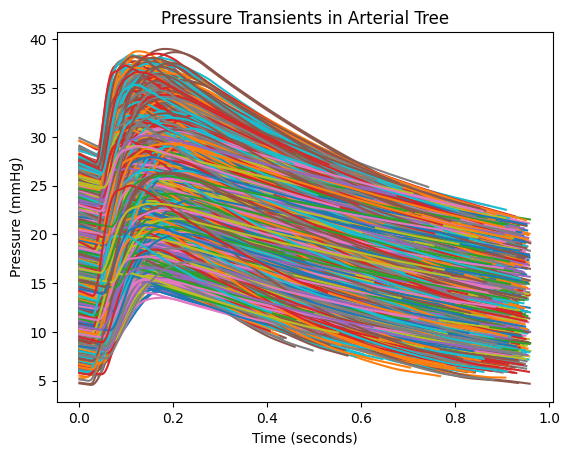

In [23]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    if not isinstance(test[ind], bool):
        # Adjust time and pressure trace for each realization
        t = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
        p_pat = test[ind].loc[ind]['p_pat']  # Pressure transient

        # Plot the pressure transient for each realization
        ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

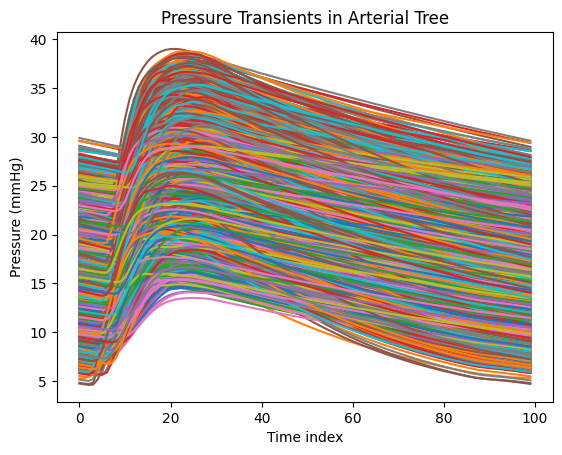

In [24]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    if not isinstance(test[ind], bool):
     p_pat_raw = test[ind].loc[ind]['p_pat'].values.copy()
     T = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
     T = T.values.copy()
     T_resample = np.linspace(T[0], T[-1], 100)
    

     # Interpolate pressure for 100 timesteps from 1000
     p_pat_resampled = np.interp(T_resample, T, p_pat_raw)

     # Plot the interpolated pressure transient for each realization
     ax.plot(list(range(100)), p_pat_resampled, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
#ax.legend()

# Display the plot
plt.show()

### Plot pressure in RV

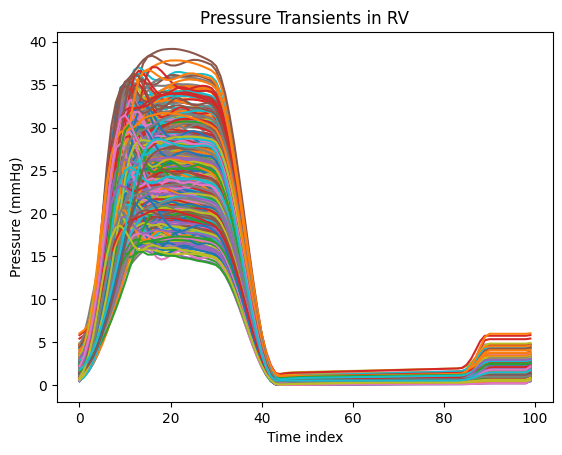

In [25]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(500): 
    if not isinstance(test[ind], bool):
     p_rv_raw = test[ind].loc[ind]['p_rv'].values.copy()
     T = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
     T = T.values.copy()
     T_resample = np.linspace(T[0], T[-1], 100)
    

     # Interpolate pressure for 100 timesteps from 1000
     p_rv_resampled = np.interp(T_resample, T, p_rv_raw)

     # Plot the interpolated pressure transient for each realization
     ax.plot(list(range(100)), p_rv_resampled, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in RV')

# Add legend to the plot
#ax.legend()

# Display the plot
plt.show()

### Some of above traces are still nonsense
The code below will remove non feasible traces

In [26]:
## Create directory for pessure traces 
os.system(f'mkdir -p {path}/Outputs/Output_{n_sample}_{n_params}params/pressure_traces_pat')
os.system(f'mkdir -p {path}/Outputs/Output_{n_sample}_{n_params}params/pressure_traces_rv')

0

### Save feasible pressure traces, CO and dt, dPAP, sPAP, mPAP

In [27]:
# screen determines whetehr to screen for non-physiological pressure traces
screen = False

In [28]:
# Create column headers
headers = list(range(100)) + ['CO', 'dt', 'EF', 'dPAP', 'sPAP', 'mPAP'] 

# List to collect all pressure traces
pressure_traces_list_pat = []
pressure_traces_list_rv = []

for ind in range(len(test)):
    if not isinstance(test[ind], bool):
     
     # PAT pressure
     p_pat_raw = test[ind].loc[ind]['p_pat'].values.copy()
     
     # RV pressure 
     p_rv_raw = test[ind].loc[ind]['p_rv'].values.copy()

     T = test[ind].loc[ind]['T'].values.copy()
     T_resample = np.linspace(T[0], T[-1], 100)

     # Interpolate pressure for 100 timesteps from 1000
     p_pat_resampled = np.interp(T_resample, T, p_pat_raw)
     p_rv_resampled = np.interp(T_resample, T, p_rv_raw)

     # Compute CO
     q_pat = test[ind].loc[ind]['q_pat'].values.copy()
     CO = np.sum(q_pat) * (T[1] - T[0]) / (T[-1] - T[0]) * 60. / 1000.  # L / min

     # Compute EF
     v_rv = test[ind].loc[ind]['v_rv'].values.copy()
     EF = (np.max(v_rv) - np.min(v_rv)) / np.max(v_rv)

     # Compute dPAP, sPAP, mPAP
     dPAP = min(p_rv_raw)
     sPAP = max(p_rv_raw)
     mPAP = np.mean(p_rv_raw)
    
     # Record time interval, approx T (input param) / 100, there are some rounding differences due to interpolation
     tl = T_resample - test[ind].loc[ind]['T'].iloc[0]
     dt = np.diff(tl)[0]

     
     # Only create array if conditions hold or screening is turned off
     if not screen or (2 < CO < 12 and 4 < dPAP < 67 and 9 < mPAP < 87 and 15 < sPAP < 140):
     
     # Create a 2D array for saving
        pressure_trace_pat = np.hstack((p_pat_resampled, [CO], [dt], [EF], [dPAP], [sPAP], [mPAP]))
        pressure_trace_rv = np.hstack((p_rv_resampled, [CO], [dt], [EF], [dPAP], [sPAP], [mPAP]))
        pressure_traces_list_pat.append(pressure_trace_pat)
        pressure_traces_list_rv.append(pressure_trace_rv)
        
        # Save individual pressure trace to CSV with headers
        individual_df_pat = pd.DataFrame([pressure_trace_pat], columns=headers)
        individual_df_pat.to_csv(f'{path}/Outputs/Output_{n_sample}_{n_params}params/pressure_traces_pat/pressuretrace_{ind}.csv', index=False)
        individual_df_rv = pd.DataFrame([pressure_trace_rv], columns=headers)
        individual_df_rv.to_csv(f'{path}/Outputs/Output_{n_sample}_{n_params}params/pressure_traces_rv/pressuretrace_{ind}.csv', index=False)

# Convert the list of pressure traces to a DataFrame
pressure_traces_df_pat = pd.DataFrame(pressure_traces_list_pat, columns=headers)
pressure_traces_df_rv = pd.DataFrame(pressure_traces_list_rv, columns=headers)

# Save the DataFrame to a single CSV file with headers
pressure_traces_df_pat.to_csv(f'{path}/Outputs/Output_{n_sample}_{n_params}params/pressure_traces_pat/all_pressure_traces.csv', index=False)
pressure_traces_df_rv.to_csv(f'{path}/Outputs/Output_{n_sample}_{n_params}params/pressure_traces_rv/all_pressure_traces.csv', index=False)

### Plot successful traces

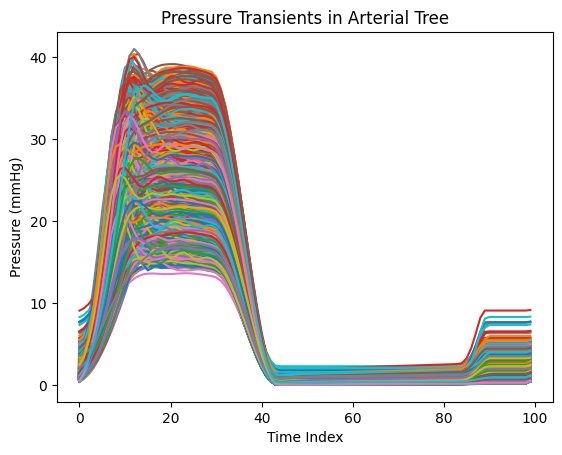

In [29]:
good_sims = pd.read_csv(f'{path}/Outputs/Output_{n_sample}_{n_params}params/pressure_traces_rv/all_pressure_traces.csv')
# Initialize the plot
fig, ax = plt.subplots()

for ind in range(len(good_sims)): 
    t = range(100) # Time adjustment
    p_pat = good_sims.iloc[ind, :100].values # Pressure transient

    # Plot the pressure transient for each realization
    ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time Index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

### Need to add code here to resave input file with only successful simulations

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%